***Note: Upload the recruitement_data.csv file when you open a new session. ***

## **Applying Supervised Machine Learning to Predicting Hiring Decisions**

***CFG - Group 2 Assignment***

**Team: Verena Sarrazin, Manda Shemirani, Shona Olulode, [Hannah McCormick]**

**July 2024**

## Table of Contents:
I- Introduction

II- Libraries & Data Upload

1. Variable Definitions
2. Variables Statistical Description

III- Data Pre-processing
1. Dealing with missing data
2. Removal of unsuitable predictor variable

IV- Exploratory Data Analysis (EDA)
1. Distribution of the target variable
2. Distributions of the predictor variables
3. Correlation Heatmap
4. Distribution of feature variables against the target variable

V- Further data pre-processing
1. Train-Test Split
2. Oversampling & Standardisation

VI- Applying ML techniques

- Setting up cross-validation
- Model fitting and hyperparameter tuning
- Assessing model performance

1. Logistic Regression
2. Support Vector Machine (SVM)
3. Random Forest

VII- Conclusions

# **I- Introduction**

 Finding the first job or changing jobs are perhaps among the most important events in one's life. In today's world, many factors can influence the chance of someone behing hired.

 While factors such as the level of education, experience, and technical skills are believed to positively influence a hiring ouctome, the impact of other factors such as location, gender, and age are debated. Other factors including interpersonal skills and ability to perform at an interview are seemingly  becoming more important in the hiring process.

 While the relationships between the features and hiring outcomes are intuitive, expected, or at times debated, the fact remains that a combination of all these factors influence the hiring outcome.  

 In this project we employ Machine Learning (ML) techniques to find a model that best captures the real world data and provides reliable predictions. We will use actual historical data on various factors (features) and hiring outcomes to train our models. As we are using structured and labelled data, our approach would be a 'supervised machine learning'.  
 We then explore performance metrics for these models and select the one that can better model and predict the hiring outcome. To setup and train our ML models, we need to take many steps. We will discuss each step and our approach in more details in the following sections.

 The anonymised dataset, which provides insights into attributes influencing hiring decisions is from *Rabie El Kharoua. (2024). 💼 Predicting Hiring Decisions in Recruitment Data [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8715385*


# **II- Libraries & Data Upload**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from scipy.stats import expon
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif


Upload the .csv file as a dataframe called 'data' and explore the data by looking at its head, shape, and info.

In [ ]:
# Read in csv file
data = pd.read_csv('recruitment_data.csv')
data.head(3)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0


## 1. Variables Definitions

0) Age: 20 to 50

1) Gender: Male (0) or Female (1)

2) Education Level: 1-Bachelor's (Type 1), 2-Bachelor's (Type 2), 3-Master's, 4-PhD

3) Experience Years: 0 to 15 years

4) Previous Companies:  No of previous companies where the candidate worked (1 to 5 companies)

5) Distance From Company: Km between the candidate's residence to the company, (1Km to 50Km)

6) Interview Score: 0 to 100

7) Skill Score: Candidate's technical skills (0 to 100)

8) Personality Score: Personality traits (0 to 100)
    
9) Recruitment Strategy: 1-Aggressive, 2-Moderate, 3-Conservative (we will remove this variable, see below)
   
10) Hiring Decision (Target Variable):  0-Not hired, 1-Hired

***Source: Rabie El Kharoua. (2024). 💼 Predicting Hiring Decisions in Recruitment Data [Data set]. Kaggle.*** https://doi.org/10.34740/KAGGLE/DSV/8715385

## 2. Variables Statistical Description

Here we look at the descriptive statistics for each variable. Descriptive statistics provides a summary of the central tendency, dispersion and shape of the data.

In [ ]:
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


# **III- Data Pre-processing**


## 1. Dealing with missing data

In [ ]:
# Print the number of rows and columns, and look at data types and number of null values
print('Rows:', data.shape[0])
print('Columns:', data.shape[1], '\n')
data.info()

Rows: 1500
Columns: 11 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


All variables have 1500 non-missing values, so there is no missing data. All variables are numeric (int or float). We will come back to this at the end of pre-processing.

## 2. Removal of unsuitable predictor variable

The aim of our project is to build a model that can be used for making future predictions, i.e., calculate chances of applicants being hired. Applicants do not usually know the company's recruitment strategy a priori, hence we exclude the variable 'RecruitmentStrategy' from the dataset.

In [ ]:
# Drop variable
data.drop(columns=['RecruitmentStrategy'], inplace=True)
# Double-check if it has been removed
data.keys()

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'HiringDecision'],
      dtype='object')

# **IV- Exploratory Data Analysis (EDA)**

## 1. Distribution of the target variable

The target variable is *HiringDecision*, with values 0 (rejected) and 1 (hired). We need to check if the distribution is balanced.

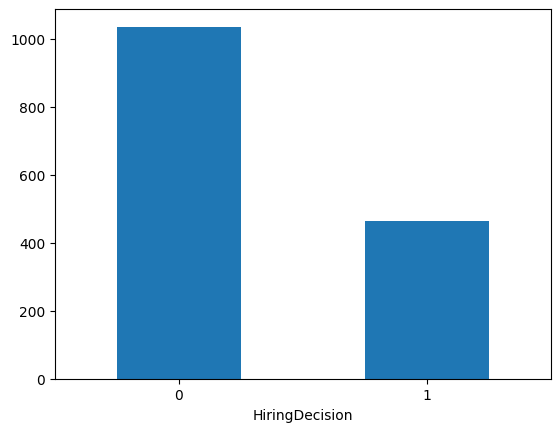

In [ ]:
# Assess distribution of the outcome variable using a bar chart
data['HiringDecision'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

There are around twice as many non-hiring decisions than hiring decisions. ML algorithms tend to perform sub-optimally if the outcome classes are imbalanced. There are different ways to address this issue, like oversampling the less frequent class or choosing appropriate performance metrics.
See for example: https://datasciencehorizons.com/handling-imbalanced-datasets-in-scikit-learn-techniques-and-best-practices/

We will deal with this problem in further data pre-processing below.


## 2. Distributions of the predictor variables

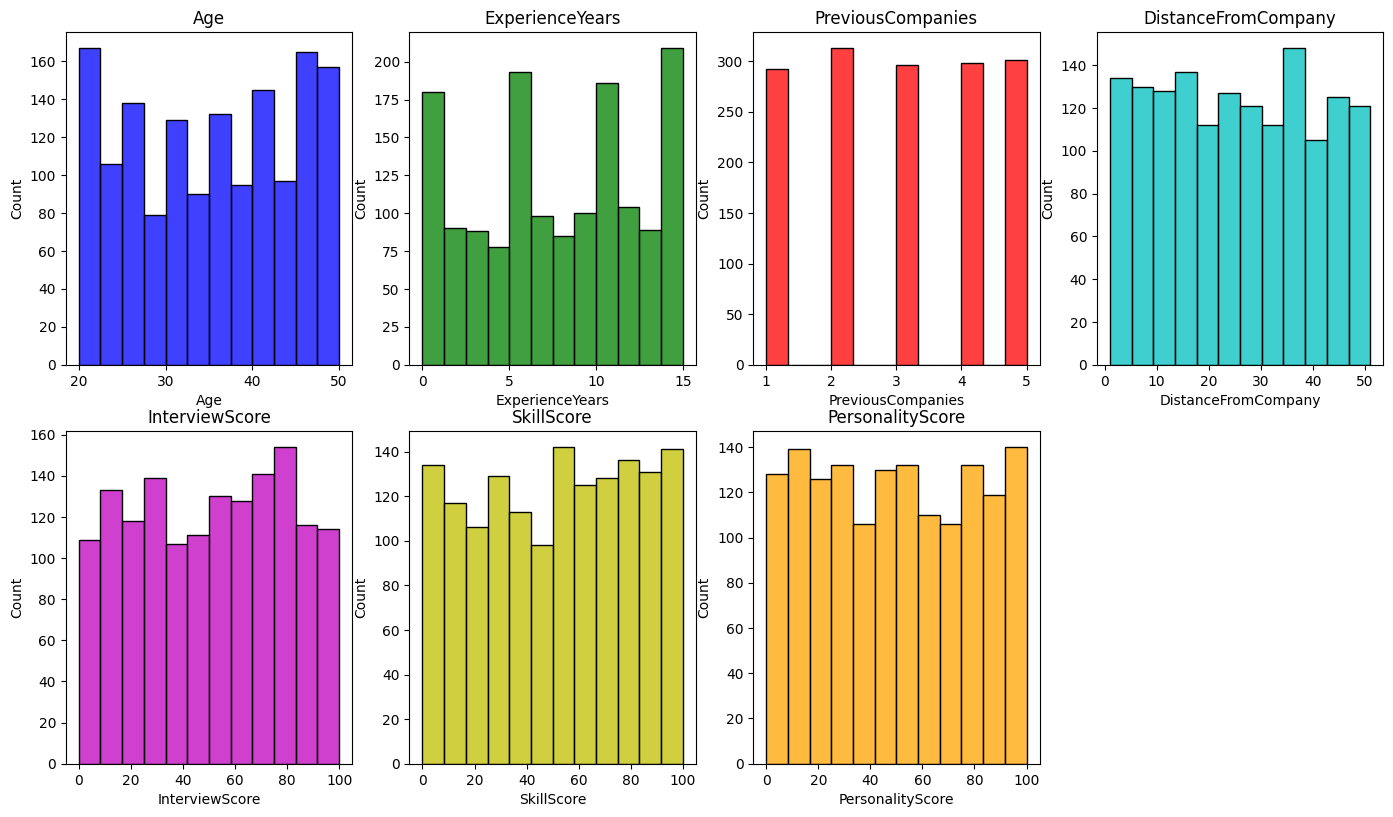

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Continuous variables: Age, ExperienceYears, PreviousCompanies, DistanceFromCompany, InterviewScore, SkillScore, PersonalityScore

continuous = data[['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']]
colors = ['b','g','r','c','m','y','orange']

fig, axes = plt.subplots(2, 4, figsize=(17, 9.5))
axes = axes.flatten()
for i, var in enumerate(continuous):
    plt.figure()
    sns.histplot(data=data, x=var, color=colors[i], ax=axes[i])
    axes[i].set_title(var)
fig.delaxes(axes[-1])  # because we have odd number of sub-plots so it remove the last subplot (8th subplot)
plt.show()

All continuous variables seem to be almost uniformly distributed. There are no outliers or heavily skewed distributions, so no adjustments are required.
We will now look at the categorical variables.

Text(0.5, 1.0, 'Education Level Distribution')

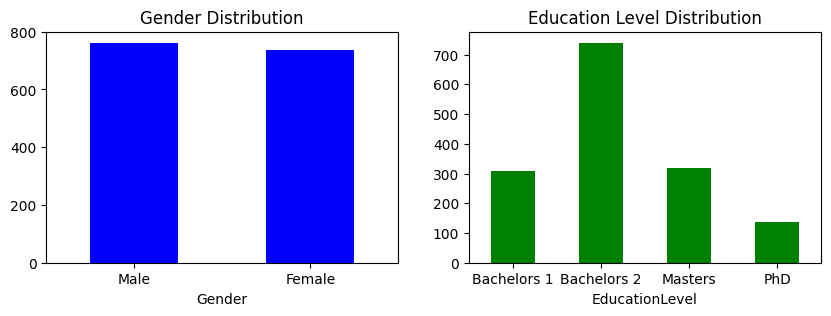

In [ ]:
# Categorical variables: Gender, EducationLevel

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Figure for Gender
data['Gender'].value_counts().plot(kind='bar', color=colors[0], ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'], rotation=0)
axes[0].set_title('Gender Distribution')

# Figure for EducationLevel
data['EducationLevel'].value_counts()[[1, 2, 3, 4]].plot(kind='bar', color=colors[1], ax=axes[1])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Bachelors 1', 'Bachelors 2', 'Masters', 'PhD'], rotation=0)
axes[1].set_title('Education Level Distribution')

As it can be seen, men and women are equally represented in the dataset. However, for the education level, the difference between Bachelors1 and Bachelor2 was unclear (no data definition was found). We will therefore combine it into a single category (0). Additionally, since PhD occurs only rarely in the dataset, we will combine it with Master's (1). The result would be to have two levels of eductaions.

<ipython-input-10-0a88d6792096>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EducationLevel'][data['EducationLevel'] == 1] = 0
<ipython-input-10-0a88d6792096>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EducationLevel'][data['EducationLevel'] == 2] = 0
<ipython-input-10-0a88d6792096>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EducationLevel'][data['EducationLevel'] == 3] = 1
<ipython-input-10-0a88d67920

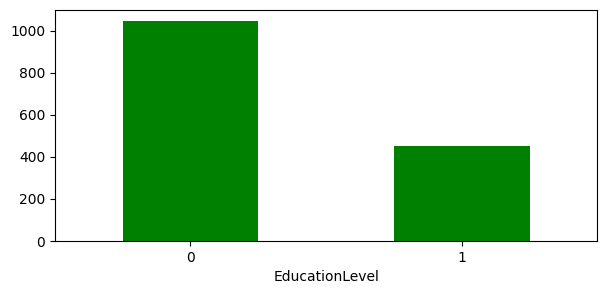

In [ ]:
# ATTENTION: Only run this once

# Recode Bachelor's 1 and 2
data['EducationLevel'][data['EducationLevel'] == 1] = 0
data['EducationLevel'][data['EducationLevel'] == 2] = 0
# Recode Master's and PhD
data['EducationLevel'][data['EducationLevel'] == 3] = 1
data['EducationLevel'][data['EducationLevel'] == 4] = 1

# Double-check this has worked
plt.figure(figsize=(7, 3))
data['EducationLevel'].value_counts().plot(kind='bar', color=colors[1])
plt.xticks(rotation=0)
plt.show()

##3. Correlation Heatmap

We start by looking at the degree of correlation between the variables using a Correlation Heatmap. Note that we are using [-1, 1] range to also show the direction (in addition to the strength) of the relationships.

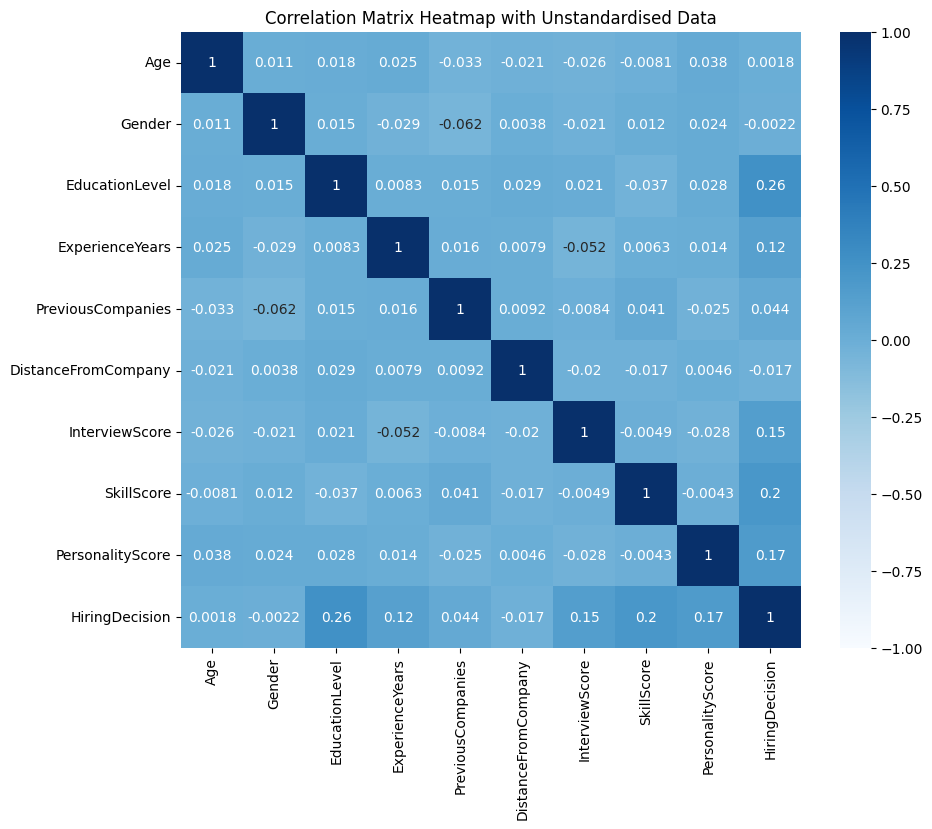

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap with Unstandardised Data')
plt.show()

As it can be seen, there is a 'positive' relationship (correlation coefficient >= 0.20) between the HiringDecision (target variable) and EducationLevel and SkillScore. This is consistent with our general expectations. Interview score and personality test score also show a positive correlation with the hiring outcome.

Other features such as Age and Gender and Distance from the Company did not show a strong relationship with the target varaible. This is reassuring from the perspective of a job applicants. However, in terms of the modelling, this could indicate that these variable may not be significant in predicting the hiring outcome (i.e. they do not add to the explanatory power of the model).

The code below recreates the Correlation Heatmap using the standardised data. Standardisatin does not change the relationship between the variables, so the correlations are the same as for the unstandardised data. We have hidden the results and are just showing the code here.

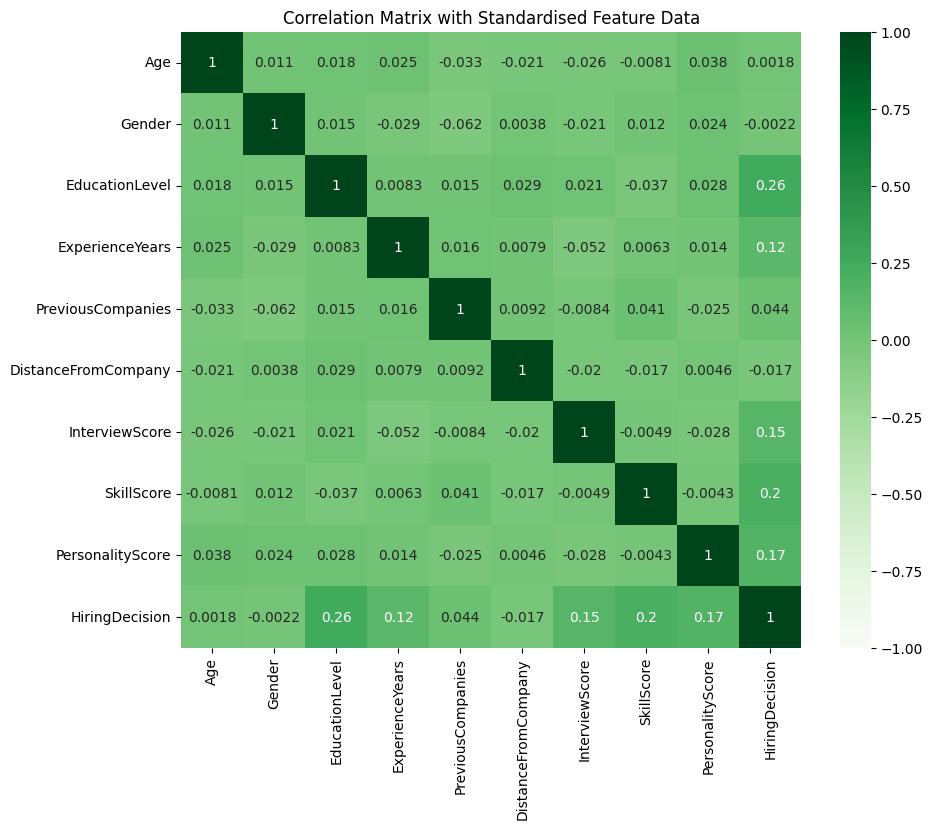

In [ ]:
from sklearn.preprocessing import StandardScaler

# First standardise the features
features = ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

X = data[features]
y = data['HiringDecision']

# Standardising the features
X_scaled = StandardScaler().fit_transform(X)

# Create a new DataFrame (df) with the standardized data
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Add the target variable back to the standardised df
data_scaled = pd.concat([X_scaled_df, y], axis=1)

correlation_matrix = data_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Standardised Feature Data')
plt.show()

##4. Distribution of feature variables against the target variable
We now use 'boxplot' to explore the distribution of continuous variables against a categorical variable. This is useful for comparing distributions of features like Age, ExperienceYears, InterviewScore, etc., against the target variable (HiringDecision).

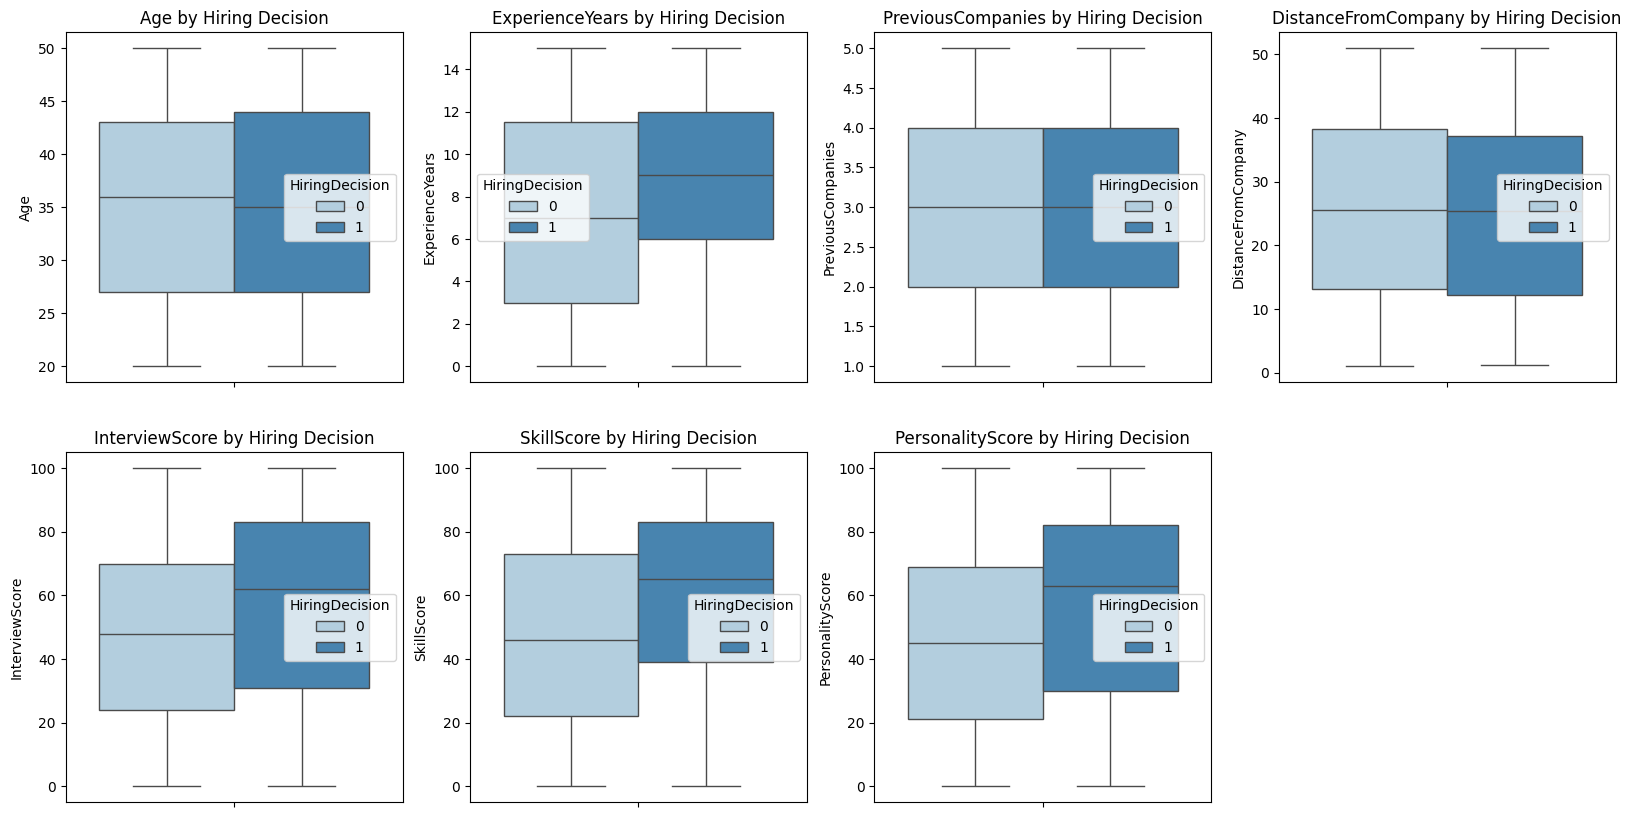

In [ ]:
# List of continuous features, which will be plotted agians the terget variable
continuous_vars = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany',
                   'InterviewScore', 'SkillScore', 'PersonalityScore']

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for i, var in enumerate(continuous_vars):
    sns.boxplot(hue='HiringDecision', y=var, data=data, palette='Blues', ax=axes[i])
    axes[i].set_title(f'{var} by Hiring Decision')

fig.delaxes(axes[-1])  #Remove the last (8th) subplot since we have only 7 variables (plots)
plt.show()

As it can be seen, features such as Age, PreviousCompanies, and DistanceFromCompany have a relatively similar distribution across the two outcomones of the HiringDecion, meaning they do not have a significant impact on the outcome. This is consistent with the finding from Correlation Matrix, where these variables showed a negligible (almost no) relationship with the target variable.

On the other hand, higher scores in interview, skills test and personality test are associated with being hired (HiringDecision=1). This is also consistent with our previous correlation analysis.

# **V- Further data pre-processing**

## 1. Train-Test Split

We will now divide the dataset into training and testing parts, since the remaining pre-processing steps will be applied to training and testing data separately.  

We will split up the dataset into training (80%) and testing data (20%). The ML analysis will further divide the training data into training and validation data in the cross-validation procedure, see below.

In [ ]:
# Split up into predictors (X) and target variable (y)
X = data.iloc[:, 0:9]
y = data.iloc[:, 9]
X.head()
y.head()

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Training samples:', X_train.shape[0])
print('Testing samples:', X_test.shape[0])


Training samples: 1200
Testing samples: 300


## 2. Oversampling & Standardisation

**Oversampling**: Most ML algorithms perform suboptimally if the outcome class is imbalanced. In this dataset, there are roughly twice as many non-hiring decisions than hiring decisions. One recommended solution is to oversample the 'minority class', i.e. non-hiring decisions in this case.

The simplest approach involves duplicating examples in the minority class to enable more samples. This data augmentation is referred to as the Synthetic Minority Oversampling Technique (SMOTE), which we will use here. Note that the oversampling will only be applied to the training data (the testing data will be treated as independent dataset). See for example: https://datasciencehorizons.com/handling-imbalanced-datasets-in-scikit-learn-techniques-and-best-practices/


**Standardisation:** For most ML algorithms, the predictor variables need to be standardised since they all have different units and value ranges. The outcome variable will not be standardised (it is a binary 0 and 1, which is what most classification algorithms would expect). Standardisation transforms each feature such that it has a mean of zero and standard diviation of 1.

Standardisation needs to be done separately between training data and testing data to avoid information leakage (the testing dataset will be treated as completely independent dataset).

For more information see for example:  "Tokuc and Aibin, Normalization vs Standardization in Linear Regression", Baeldung, March 2024 (https://www.baeldung.com/cs/normalization-vs-standardization) or "Why standardization of the testing set has to be performed with the mean and sd of the training set?" (https://stats.stackexchange.com/questions/202287/why-standardization-of-the-testing-set-has-to-be-performed-with-the-mean-and-sd)


In [ ]:
# Oversample the minority class using SMOTE technique
smote = SMOTE(random_state=42)
X_train_raw, y_train = smote.fit_resample(X_train, y_train) # X_train_raw will be re-used in the last part of the ML section

In [ ]:
# Standardise training data
scaler_train = preprocessing.StandardScaler().fit(X_train_raw)
X_train = scaler_train.transform(X_train_raw)

# The testing data need to be standardised independently
X_test_raw = X_test.copy()
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test = scaler_test.transform(X_test)

In [ ]:
# Checking variables' means. Standardisation would transform the data to have a mean of 0.
X_train.mean(axis=0)

array([-1.42975063e-16,  1.38642485e-16, -8.66515531e-18,  5.52403651e-17,
       -1.60305373e-16, -1.33768335e-16,  1.03981864e-16,  4.33257766e-17,
        7.79863978e-17])

As it can be seen, the mean of the explanatory variables are almost 0 (e-17).

In [ ]:
# Before starting modelling, we check to ensure the data transformations have been implemented correctly.
data.head(3)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision
0,26,1,0,0,3,26.783828,48,78,91,1
1,39,1,1,12,3,25.862694,35,68,80,1
2,48,0,0,3,2,9.920805,20,67,13,0


# **VI- Applying ML techniques**

With the structured and labeled data, we will be conducting Supervised ML. The target variable is categorical and binary, therefore, we will be employing techniques that are suited for binary classification.

We will use mainly 3 ML algorithms: a) Logistic Regression, b) Support Vector Machine (SVM), and c) Random Forest.

For each ML algorith we apply the same process (pipeline):

**Setting up cross-validation**
Cross-validation is a procedure used to find the best combination of model hyperparameters and evaluate the performance in held-out validation sub-samples. In k-fold cross-validation, the training dataset is split into k equal subsets. k-1 subsets serve as training data, and one subset as validation data. The model is fitted to the training data and evaluated on the validation data. This is done k times in total, with each subset serving as validation dataset once.

**Model fitting and hyperparameter tuning**

The model is fitted to the traning data using maximum likelihood or gradient descent techniques. To optimise the model hyperparameters, the model is fitted repeatedly using different combinations of hyperparameters. The best hyperparameter values will be determined based on the performance of the models in the validation subsets. Hyperparameter tuning can be done using all possible parameter combinations (GridSearchCV) or by sampling from the parameter space (RandomizedSearchCV).


**Assessing model performance**
The model with the best set of hyperparameters is then refit to the whole training dataset (all k parts). The model is then applied to the unseen testing dataset. Performance will be evaluated based on different metrics suitable for bianry classification. The metrics that we will be using are:

***F1 Score:*** The harmonic mean of Precision Score and Recall Score, is a  single metric that balances both concerns. The F1 Score is particularly useful when we want to consider both false positives and false negatives. The harmonic mean (instead of arithmetic mean) does a better job  penalising extreme values. A high F1 score can only be achieved if both precision and recall are high. The F1 Score is usually used when there are imbalanced classes because accuracy can be misleading at times.

***Accuracy Score:*** It is the ratio of instances that are correctly predicted to the total instances. Accuracy measures the overall correctness of the model. It provides a snapshot of the model performance across all classes. Accuracy can be misleading when the dataset is imbalanced.

***Recall Score:*** It is the ratio of correctly predicted positive observations to all actual positives. Its main focus is the model's ability to identify positive cases. It is used in scenarios where the cost of a false negatives is high. The recall score is aprticularly useful for imbalanced datasets when the positive class is rare.

**Precision Score:** It is the ratio of correctly predicted positive observations to the total predicted positives. Precision is used when the cost of false positives is high and when there is a need to ensure that the positive predictions are actually correct.

**Confusion Matrix:** Used to describe the perfomance of a classification model, and to provide a comprehensive view of the model's performance across all classes. It is especially useful for understanding the distribution of errors in imbalanced datasets.

(Source: SKlearn performance metrics; https://scikit-learn.org/stable/modules/model_evaluation.html)
*italicised text*

## **1. Logistic Regression**

We will start by fitting a logistic regression model, one of the simplest algorithms for a binary classification problem. We will set the opimisation algorith to liblinear, since this is recommended in the sklearn manual (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and in contrast to the default option it can be used with L1 or L2 penalty (see below).

In [ ]:
# Set up model
model = LogisticRegression(solver = 'liblinear')

### Setting up cross-validation procedure

RepeatedStratifiedKFold divides the training data into k subsets (10 in this case). It ensures that the outcome categories are equally represented in all subsets ('stratified'), so that the algorithm is not biased towards prediction of one category. The whole cross-validation procedures is repeated n_repeats times (here: 5), which helps to yield more accurate estimates for the hyperparameter tuning.

In [ ]:
# Split dataset into 10 parts. 9 will be used for training, 1 for validation. This is repeated 10 times, so that each part is used for validation once.
# The whole CV procedure is repeated 5 times.
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

### Model fitting and hyperparameter tuning

We will fine-tune two hyperparameters. C is the regularisation parameter which will be sampled from an exponential distribution. L1 and L2 are two different types of penalties, that drive the weights towards zero (L1) or make the weights more similar to one another (L2).
The metric that the hyperparameter tuning will aim to maximise is F1 score. This is a robust performance measure which balances precision and recall.

In [ ]:
# Create exponential distribution to find the best C-parameter value
C_param_dist = {
    'C': expon(scale=1), 'penalty': ['l1', 'l2']
}

# Use random search to find the best C-parameter value and penalty term
# Use F1 score as scoring metric
logistic_regression_random_search = RandomizedSearchCV(model, param_distributions=C_param_dist, scoring = 'f1', n_iter=50, cv=kf, random_state=42)
logistic_regression_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=42),
                   estimator=LogisticRegression(solver='liblinear'), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x788997ffd300>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='f1')

In [ ]:
# Print the best parameters and score
print("Best C-parameter value:", logistic_regression_random_search.best_params_)
print("Best score:", round(logistic_regression_random_search.best_score_, 3))

Best C-parameter value: {'C': 0.0007790692366582295, 'penalty': 'l2'}
Best score: 0.653


### Assessing model performance

Apply fitted model to unseen testing data and evaluate performance.

F1 score: 0.5439330543933054
Accurcay score: 0.6366666666666667
Recall score: 0.7647058823529411
Precision score: 0.42207792207792205


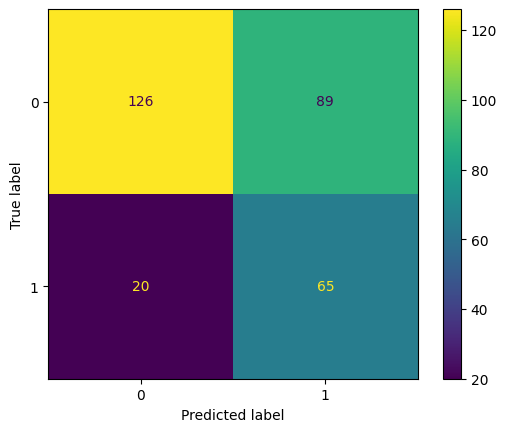

In [ ]:
# Apply model to testing data
y_pred = logistic_regression_random_search.predict(X_test)

# Evaluation metrics: We can add more to this

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)


print('F1 score:', f1)
print('Accurcay score:', acc)
print('Recall score:', rec)
print('Precision score:', pre)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_random_search.classes_)
CM.plot()

The logistic regression model had a training accuracy of 65.3%, and a testing accuracy of 63.6%, indicating that the model can predict hiring decisions above chance. Train and test performace are very similar which suggests that the model does not overfit the data. However, we might be underfitting the data (low performance due to not capturing the relationship between predictors and outcome very well), and a more complex model might be better able to capture the patterns in the data.

## **2. Support Vector Machines (SVM)**


In the next step, we will use an SVM algorithm. This algorithm allows to capture complex relationships by projecting the data into high-dimensional space and applying different types of linear and non-linear kernels.

We will optimise 3 hyperparameters (see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html):
- C: regularisation parameter (which determines the trade-off between over- and underfitting)
- kernel: can be interpreted as projection into higher dimensional space. Different kernels enable different the algorithm to capture different types of patterns in the data (e.g. linear vs. non-linear).
- gamma: width of kernel function

### Setting up cross-validation procedure

In [ ]:
# Same CV procedure as above
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

### Model fitting and hyperparameter tuning

In [ ]:
# Hyperparameter space for SVM
svm_param_dist = {
    'C': expon(scale=1),  # Exponential distribution for C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Choice between linear and rbf kernels
    'gamma': ['scale', 'auto'], # Gamma values
}

# Perform randomized search for SVM
svm_random_search = RandomizedSearchCV(SVC(),  param_distributions=svm_param_dist, n_iter=70, scoring = 'f1', cv=kf, random_state=42) # SVC(probability=True) if we want a probability estimate
svm_random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best SVM Parameters (Randomized Search):", svm_random_search.best_params_)
print("Best SVM Score (Randomized Search):", round(svm_random_search.best_score_, 3))

Best SVM Parameters (Randomized Search): {'C': 1.703829726638945, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score (Randomized Search): 0.713


### Assessing model performance

F1 score: 0.5395348837209303
Accurcay score: 0.67
Recall score: 0.6823529411764706
Precision score: 0.4461538461538462


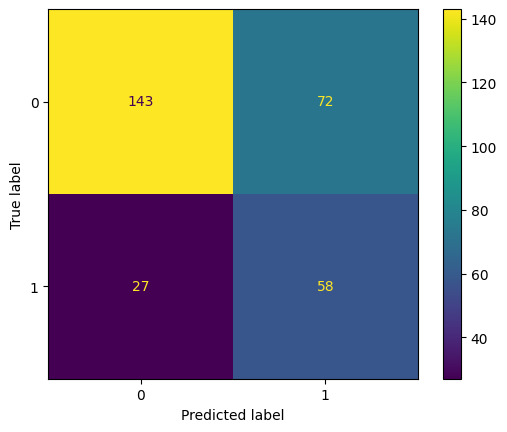

In [ ]:
# Apply model to testing data
y_pred = svm_random_search.predict(X_test)

# Evaluation metrics: We can add more to this
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)


print('F1 score:', f1)
print('Accurcay score:', acc)
print('Recall score:', rec)
print('Precision score:', pre)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_random_search.classes_)
CM.plot()

The performance of the SVM classifier is slightly better than the logistic regression algorithm (71.3% training accuracy, 67% testing accuracy).

We will try one more approach, random forest, which is well suited for binary classification and able to capture very complex relationships.

## **3. Random Forest**

Random forest is an ensemble learning algorithm composed of multiple decision trees fitted to different subsets of the data. The algorithm averages across the output of the trees which helps to reduce overfitting.

Random forests are a powerful algorithm which can capture very complex relatiomships. However, it is prone to overfitting. We will therefore apply a few techniques to prevent overfitting and improve generalisation.

**Feature selection**: One way of preventing overfitting is to reduce the number of features. We will integrate feature selection as a step in the CV procedure, so that the algorithm can decide which features are most informative (f_classif: F-test, i.e. ability of features to distinguish between the outcome categories).

**CV with integrated pre-processing pipeline**: We will set up a pipeline that will apply each pre-processing step within the CV procedure separately to the traning dataset and validation dataset. This includes feature selection (i.e. the best features will be chosen only absed on the traning data, excluding the validation data) and standardisation (we are using the raw predictor variables here which will then be standardised in the CV procedure, separately for training and validation data). This procedure avoids information leakage between training and validation data, and should lead to more accurate performance estimates in the validation subsets and more reliable hyperparameter tuning (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

The following hyperparameter will be optimised (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- percentage of features selected (see feature selection above)
- number of decision trees included in the random forest
- three parameters that limit the complexity of the tress, i.e. maximum depth, minimum number of samples contained in each leaf, minimum number of samples required to split a node

This time we chose 'balanced accuracy' which is the average recall for each class (ensures that the algorithm is not biased towards one class).


### Setting up cross-validation procedure

In [ ]:
# Same CV procedure as above
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)


### Model fitting and hyperparameter tuning

In [ ]:
# Set up random forest model
forest_model = RandomForestClassifier(random_state=42)

# Set up pre-processing pipeline
scaler = StandardScaler()
pipe = Pipeline(steps=[('feature_selection', SelectPercentile(f_classif)), ('scaler', scaler), ('rfc', forest_model)])

# Hyperparameter space used for tuning
forest_param_dist = {
'feature_selection__percentile':[80, 90, 100],
 'rfc__n_estimators': [70, 80, 85],
 'rfc__max_depth': [ 8, 9],
 'rfc__min_samples_leaf': [5, 10],
 'rfc__min_samples_split': [ 10, 20],
}

# Perform randomized search for hyperparameter tuning while embedding the pre-processing steps (specified in 'pipe') in the CV
forest_random_search = RandomizedSearchCV(pipe,  param_distributions=forest_param_dist, n_iter= 50, cv=kf, scoring = 'balanced_accuracy', random_state=42)
forest_random_search.fit(X_train_raw, y_train)

# Print the best parameters and score
print("Best Random Forest Parameters (Randomized Search):", forest_random_search.best_params_)
print("Best Random Forest Score (Randomized Search):", round(forest_random_search.best_score_, 3))

Best Random Forest Parameters (Randomized Search): {'rfc__n_estimators': 85, 'rfc__min_samples_split': 10, 'rfc__min_samples_leaf': 5, 'rfc__max_depth': 9, 'feature_selection__percentile': 100}
Best Random Forest Score (Randomized Search): 0.733


### Assessing model performance

F1 score: 0.5235602094240839
Accurcay score: 0.6966666666666667
Recall score: 0.5882352941176471
Precision score: 0.4716981132075472


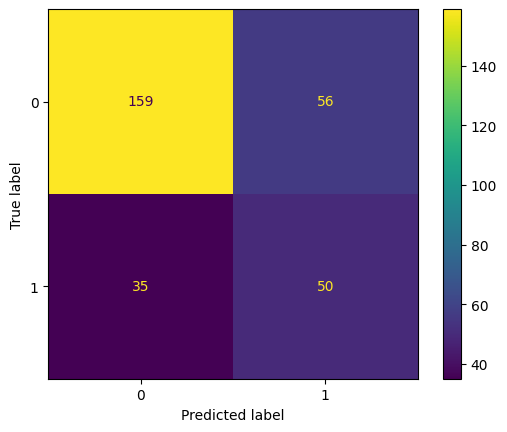

In [ ]:
# Apply model to testing data
y_pred = forest_random_search.predict(X_test_raw)

# Evaluation metrics: We can add more to this
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

print('F1 score:', f1)
print('Accurcay score:', acc)
print('Recall score:', rec)
print('Precision score:', pre)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_random_search.classes_)
CM.plot()

We can see that the Random Forest model has achieved a slightly higher accuracy compared to SVM (69.7% compared to 67%).

# **VII- Conclusions**

In our project, we have aimed to develop a model that can predict hiring outcomes based on various candidate attributes. After pre-processing the data and performing exploratory data analysis, we implemented three machine learning algorithms: Logistic Regression, Support Vector Machine (SVM), and Random Forest. Here's a summary of our findings:

### Insights from EDA:

Education Level, Interview Score, Skill Score, and Personality Score showed  positive correlations with hiring outcomes. Age, Gender, and Distance from Company showed negligible correlation with the target variable.

### Data Pre-processing:

We addressed class imbalance (more non-hiring than hiring outcomes) using the SMOTE technique. We also standardised the feature variables to ensure uniform scaling for the models.

### Model Performance:

The table below summarises the evaluation metrics for the three models. We can see that *accuracy* improves with increasing model complexity, with the Random Forest model showing the highest prediction accuracy. Interestingly, the table shows that *precision* increases with model complexity, whereas *recall* decreases, which is in line with the confusion matrices displayed above. This means that, compared to the other models, the Random Forest model leads to a minimum number of false positives (i.e. when it predicts someone will be hired, they are very likely to be hired), whereas the Logistic Regression model minimises the number of false negatives (i.e. when someone is likely to be hired, the model is likely to predict this correctly).

Which model is best suited, depends on our goal for applying the model in the future. If we want to maximise overall prediction accuracy, we should use the Random Forest model. However, if we want to encourage someone to apply for a job if there is any chance at all that they might be hired, we should use the Logistic Regression model (highest recall). If we only want to apply for a job if we are very certain our chances are high, then we should use the Random Forest model (highest precision).

<br />

| Model               | Accuracy | Recall | Precision | F1 score |
| ------------------- | -------- | ------ | --------- | -------- |
| Logistic Regression | 0.63     | 0.76   | 0.42      | 0.54     |
| SVM                 | 0.67     | 0.68   | 0.45      | 0.54     |
| Random Forest       | 0.70     | 0.59   | 0.47      | 0.52     |

<br />



### Model Application

The models can be applied by job seekers to determine how well their chances are to obtain a new job. The models in their current form predict a binary decision, i.e. hired vs. not hired. However, in a real-world scenario, job applicants might be interested in knowing their *likelihood* of being hired, rather than a binary outcome. The models can be adjusted to predict the outcome probability on a continuous scale (SciKit Learn provides a function 'predict_proba()' for this purpose).

It is also possible to extract measures of feature importance from the models to assess which of the factors considered here actually play the most important role. This might help applicants to prepare for interviews or enhance their profile in certain aspects.


### Potential Further Enhancements

- ***Feature Engineering:***  Additional features, such as specific skill sets or detailed job role requirements could potentially improve model performance.

- ***Data Collection:*** Gathering more data, especially on hired candidates, could help address the class imbalance more naturally.

- ***Model Refinement:*** Employing more advanced techniques like neural networks or increasing the complexity of current models could potentially yield better results, though the cost of such choices needs to be considered.

**Ethical Considerations:**

- ***Bias and Fairness:*** It is crucial to ensure that the models do not inadvertently reinforce existing biases in hiring practices. Regular audits and bias mitigation strategies should be implemented.

\
In conclusion, our project demonstrates that Supervised Machine Learning models (in our case, classification techniques) can effectively predict hiring outcomes based on various attributes. Which model is best suited for real-life applications needs to be decided on an individual basis, depending on the optimisation goal.